In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
sns.set_palette("Set2")

# Project
## Real Estate Price Analysis

In [16]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Housing_Price_Data.csv")

# Data Info

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [18]:
df.shape

(545, 13)

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Cleaning & Handling

In [20]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# EDA & Visualization

## Highest & lowest 10 price category columns with area other apartment feautures

In [26]:
# Sort by price in descending order and show top 10 rows
top_price_rows = df.sort_values(by="price", ascending=False).head(10).reset_index()
top_price_rows.style.background_gradient(cmap="Reds")

,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [28]:
low_price_rows = df.sort_values(by="price", ascending=True).head(10).reset_index()
low_price_rows.style.background_gradient(cmap="Oranges")

,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
1,543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
2,542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
3,541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
4,540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
5,539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
6,537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
7,538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
8,536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
9,535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished


## Price difference with and without mainroad

In [ ]:
# Group by 'mainroad' and calculate average price
price_comparison = df.groupby("mainroad")["price"].mean().reset_index()

# Rename columns for clarity
price_comparison.columns = ["Mainroad Access", "Average Price"]

price_comparison["Average Price"]=price_comparison["Average Price"].apply(lambda x:'{:.0f}'.format(x))
price_comparison


,Mainroad Access,Average Price
0,no,3398905
1,yes,4991777


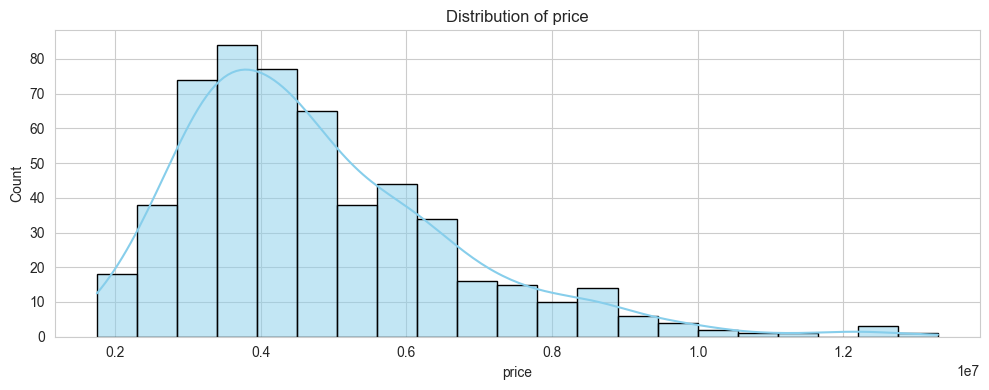

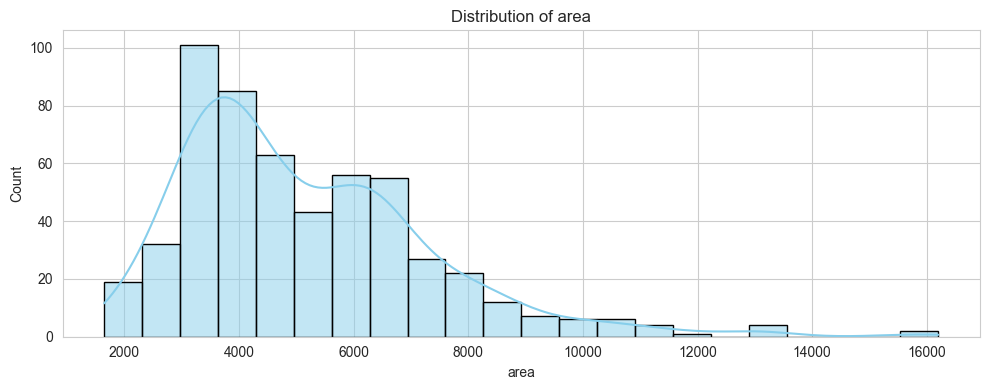

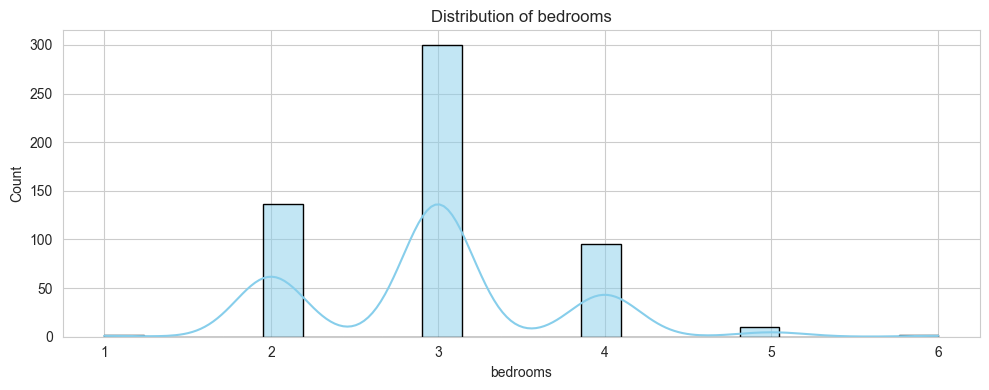

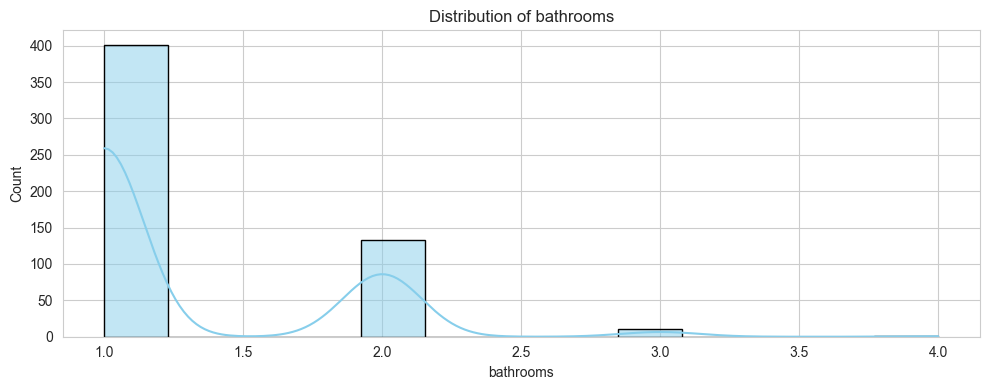

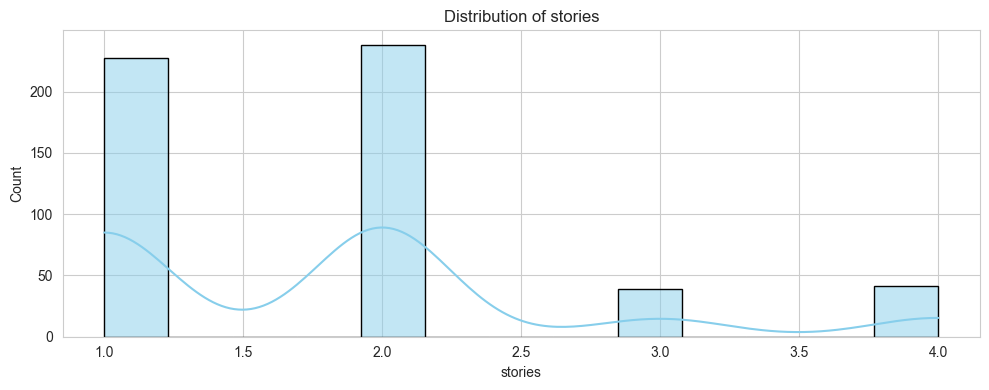

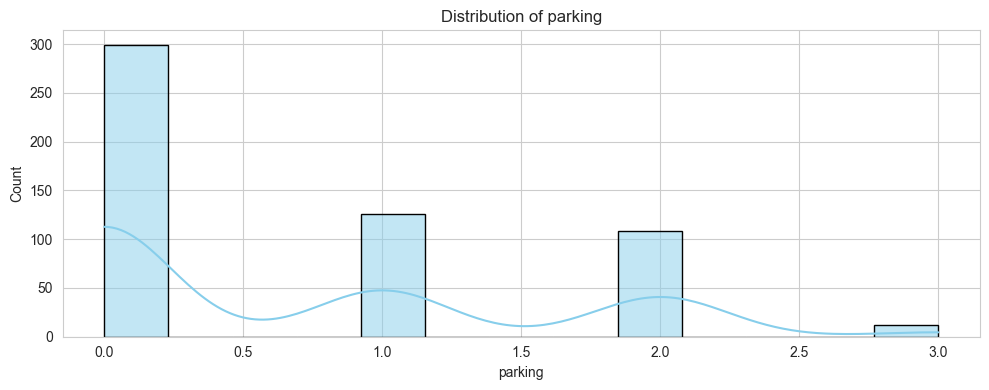

In [57]:
numeric_cols = df.select_dtypes(include="number").columns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, color="skyblue",edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


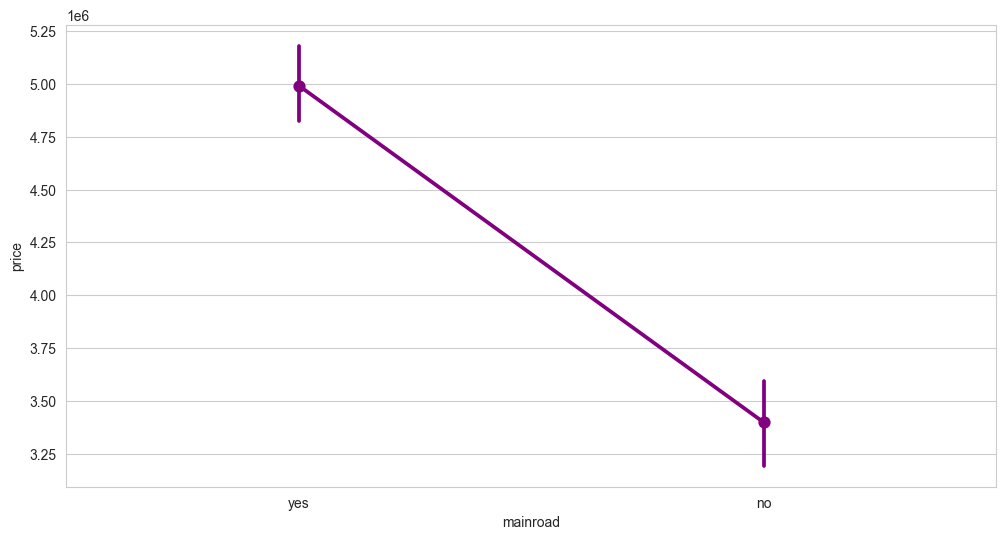

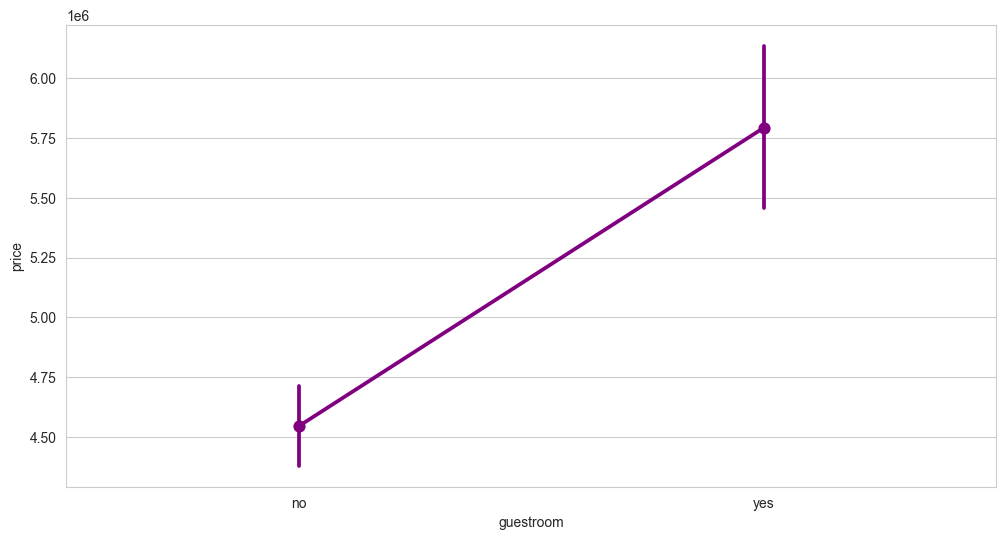

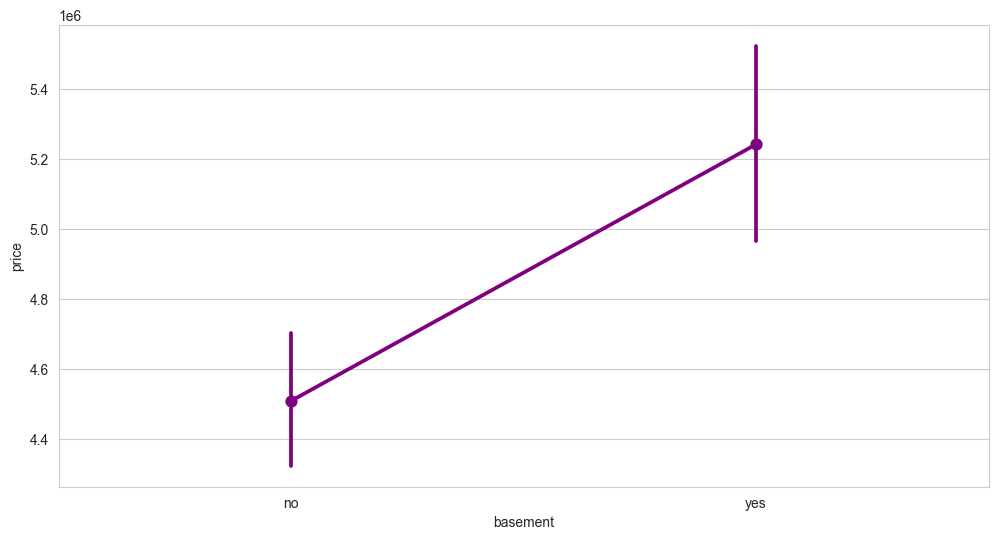

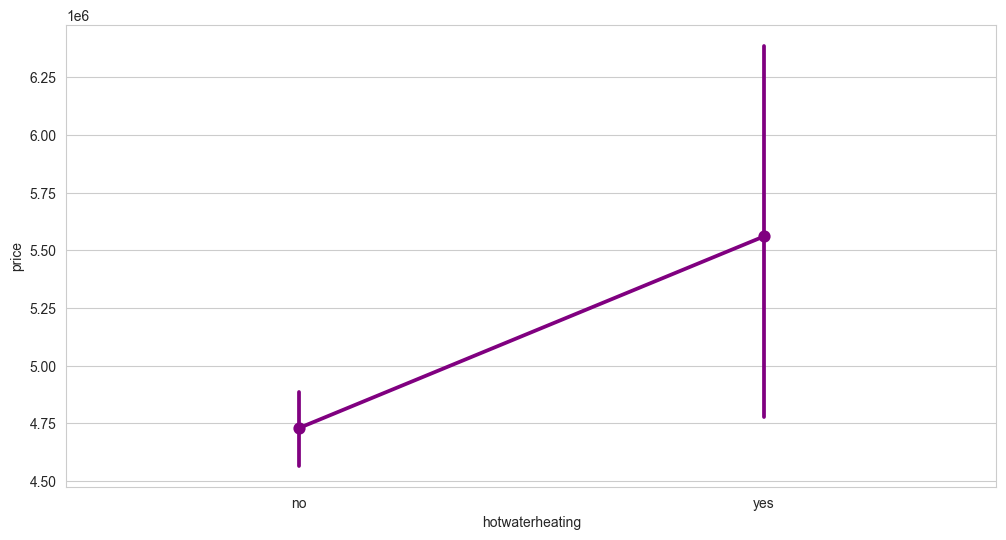

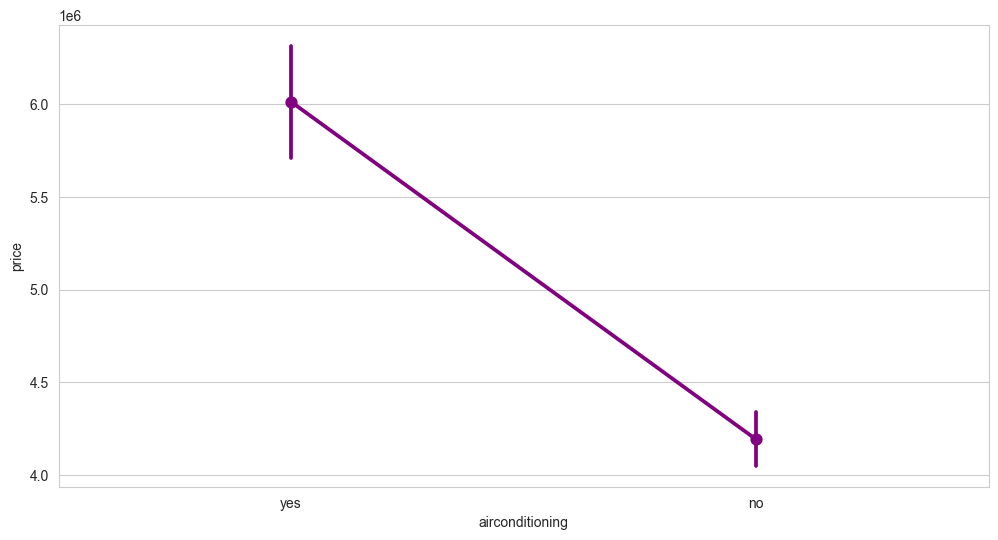

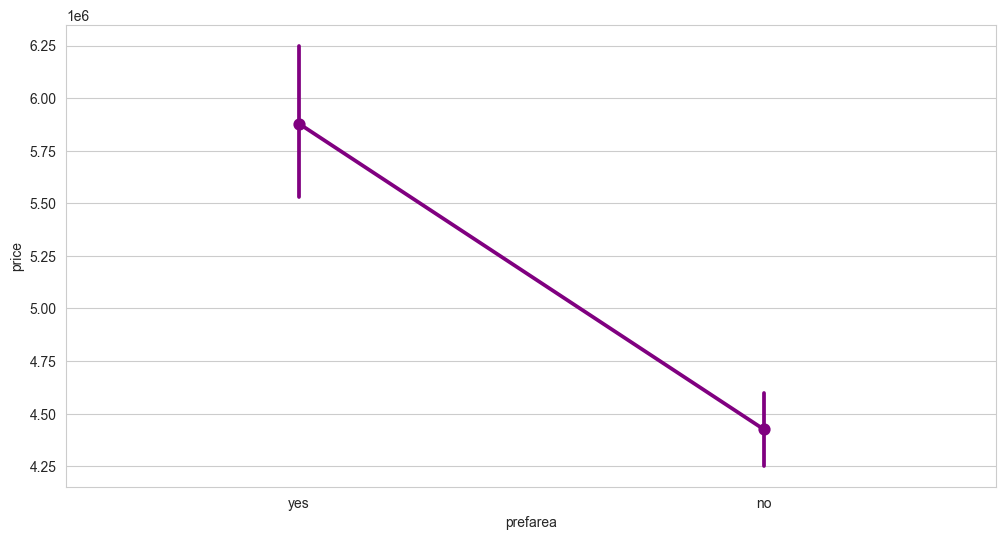

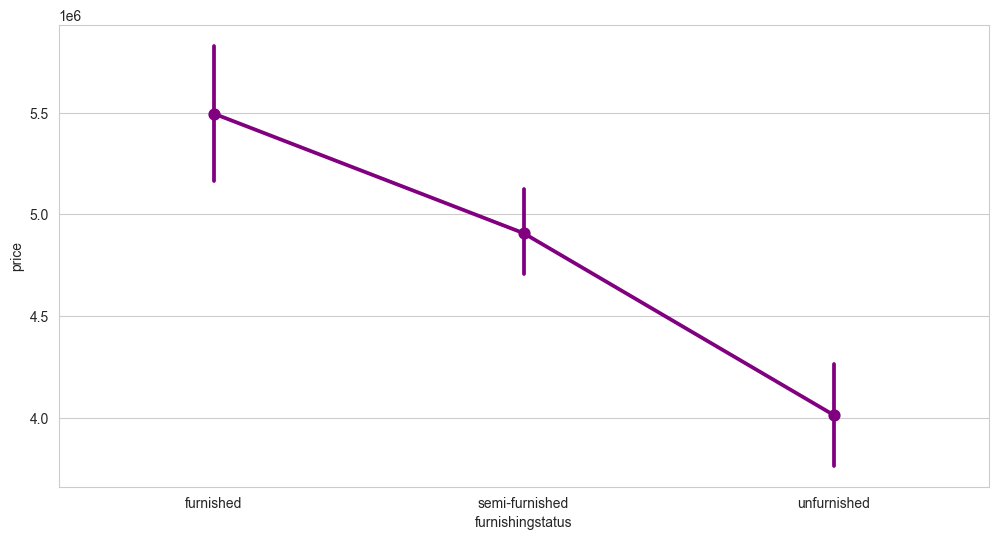

In [40]:
for col in df.select_dtypes(include="object"):
    plt.figure(figsize=(12,6))
    sns.pointplot(data=df,x=col,y="price",color="purple")
    plt.show()

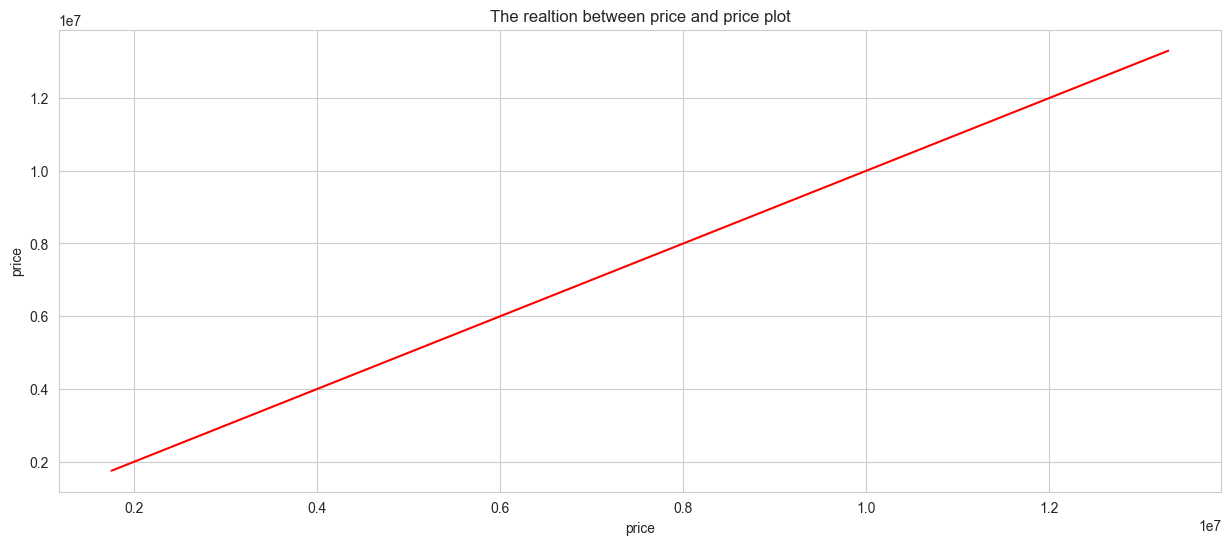

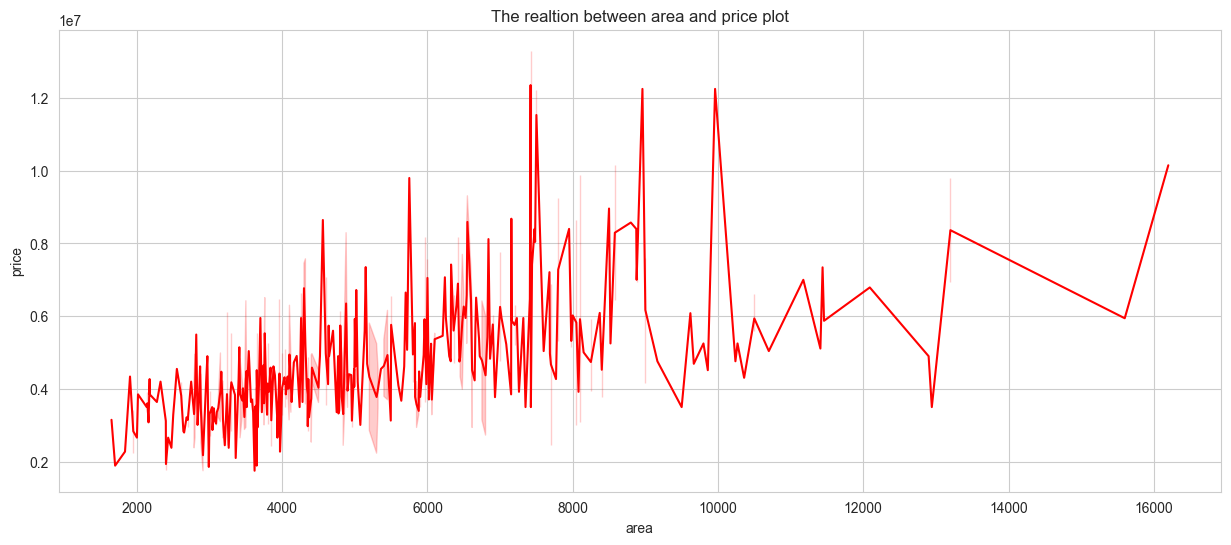

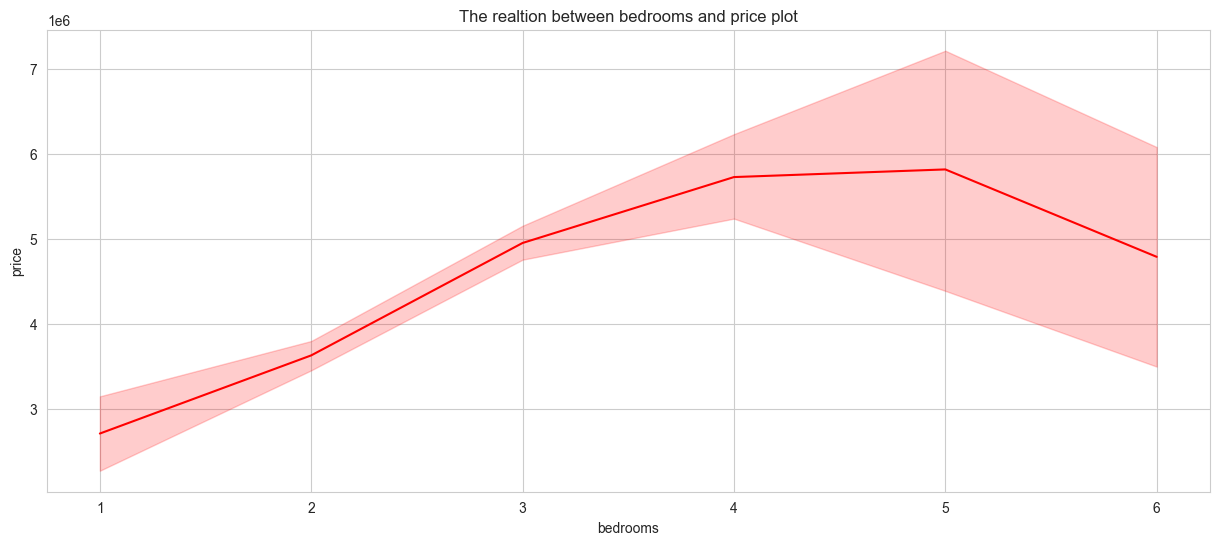

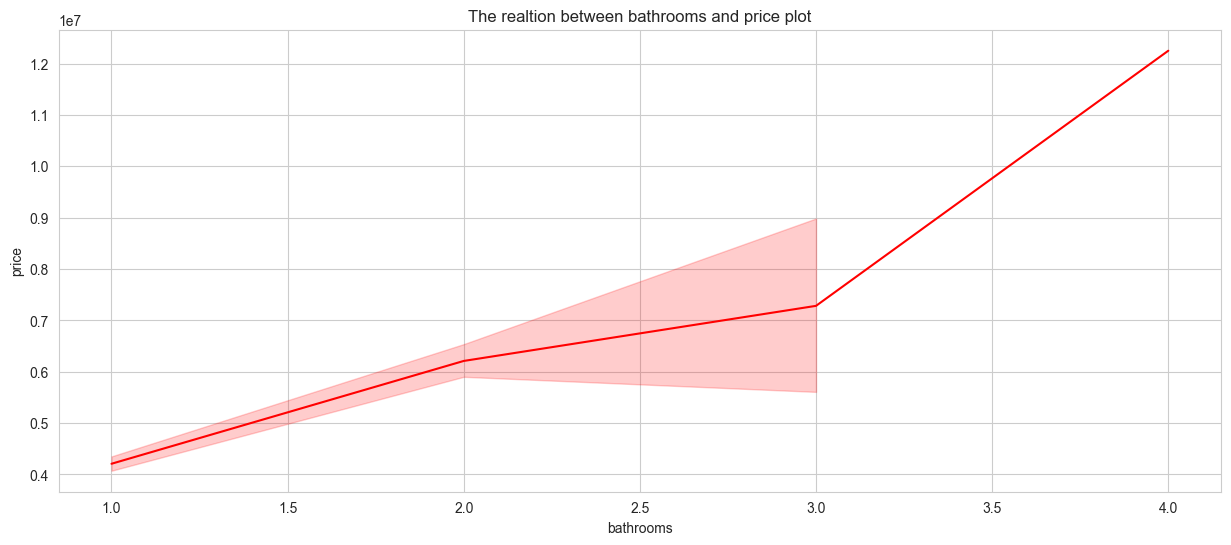

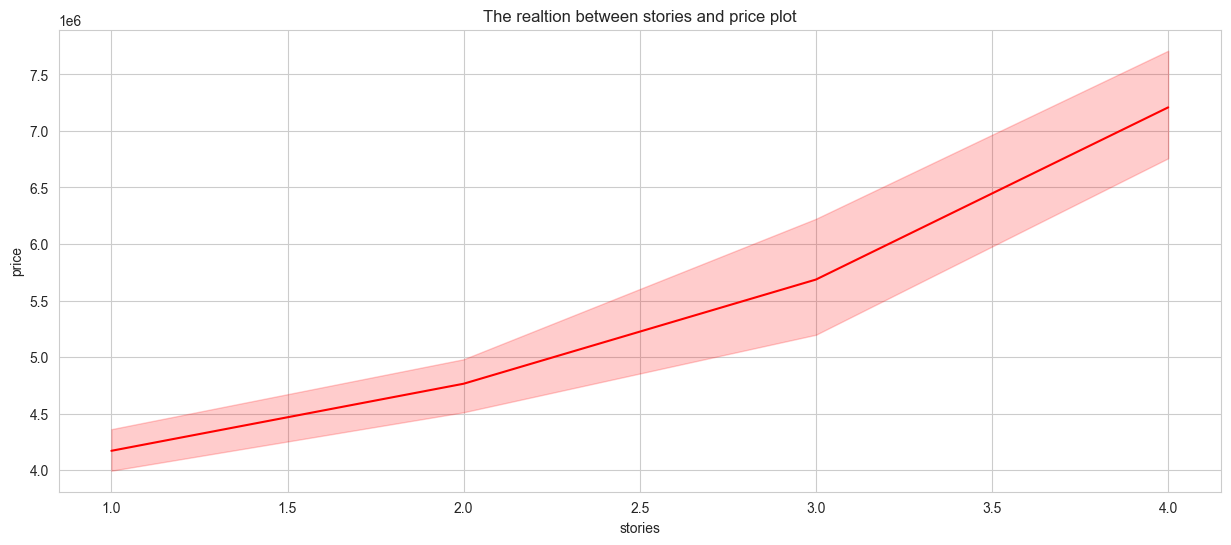

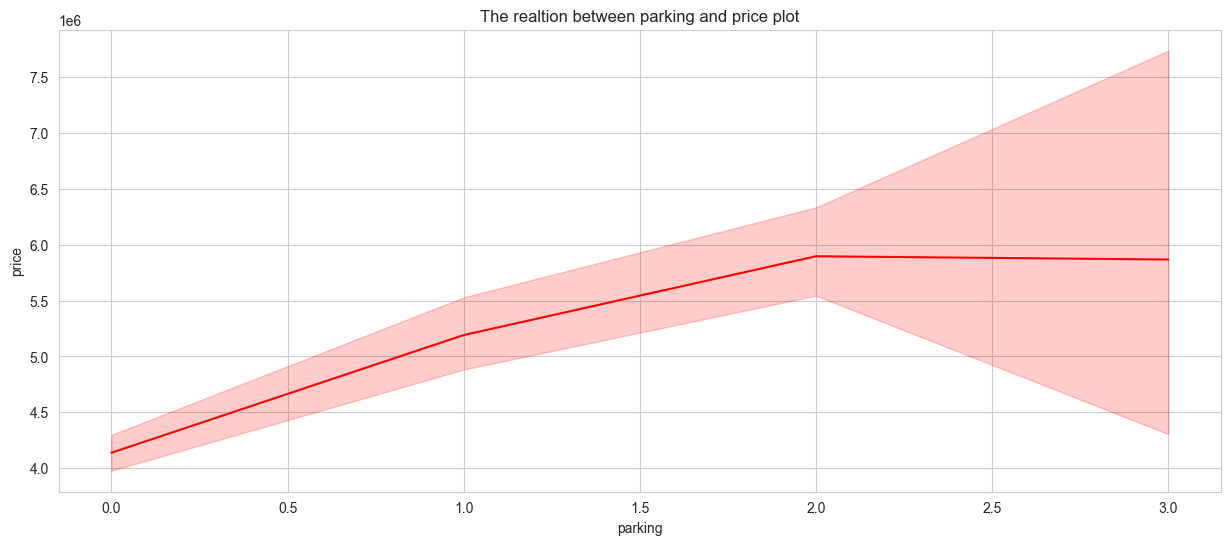

In [44]:
for col in df.select_dtypes(include="number"):
    plt.figure(figsize=(15,6))
    sns.lineplot(data=df,x=col,y="price",color="red")
    plt.title(f"The realtion between {col} and price plot")
    plt.show()

## The relation between area and price 

In [52]:
df_sorted = df.sort_values(by="area")
fig = px.line(df_sorted, x="area", y="price", title="Price vs Area")
fig.update_layout(title="The relation between area and price ")
fig.show()

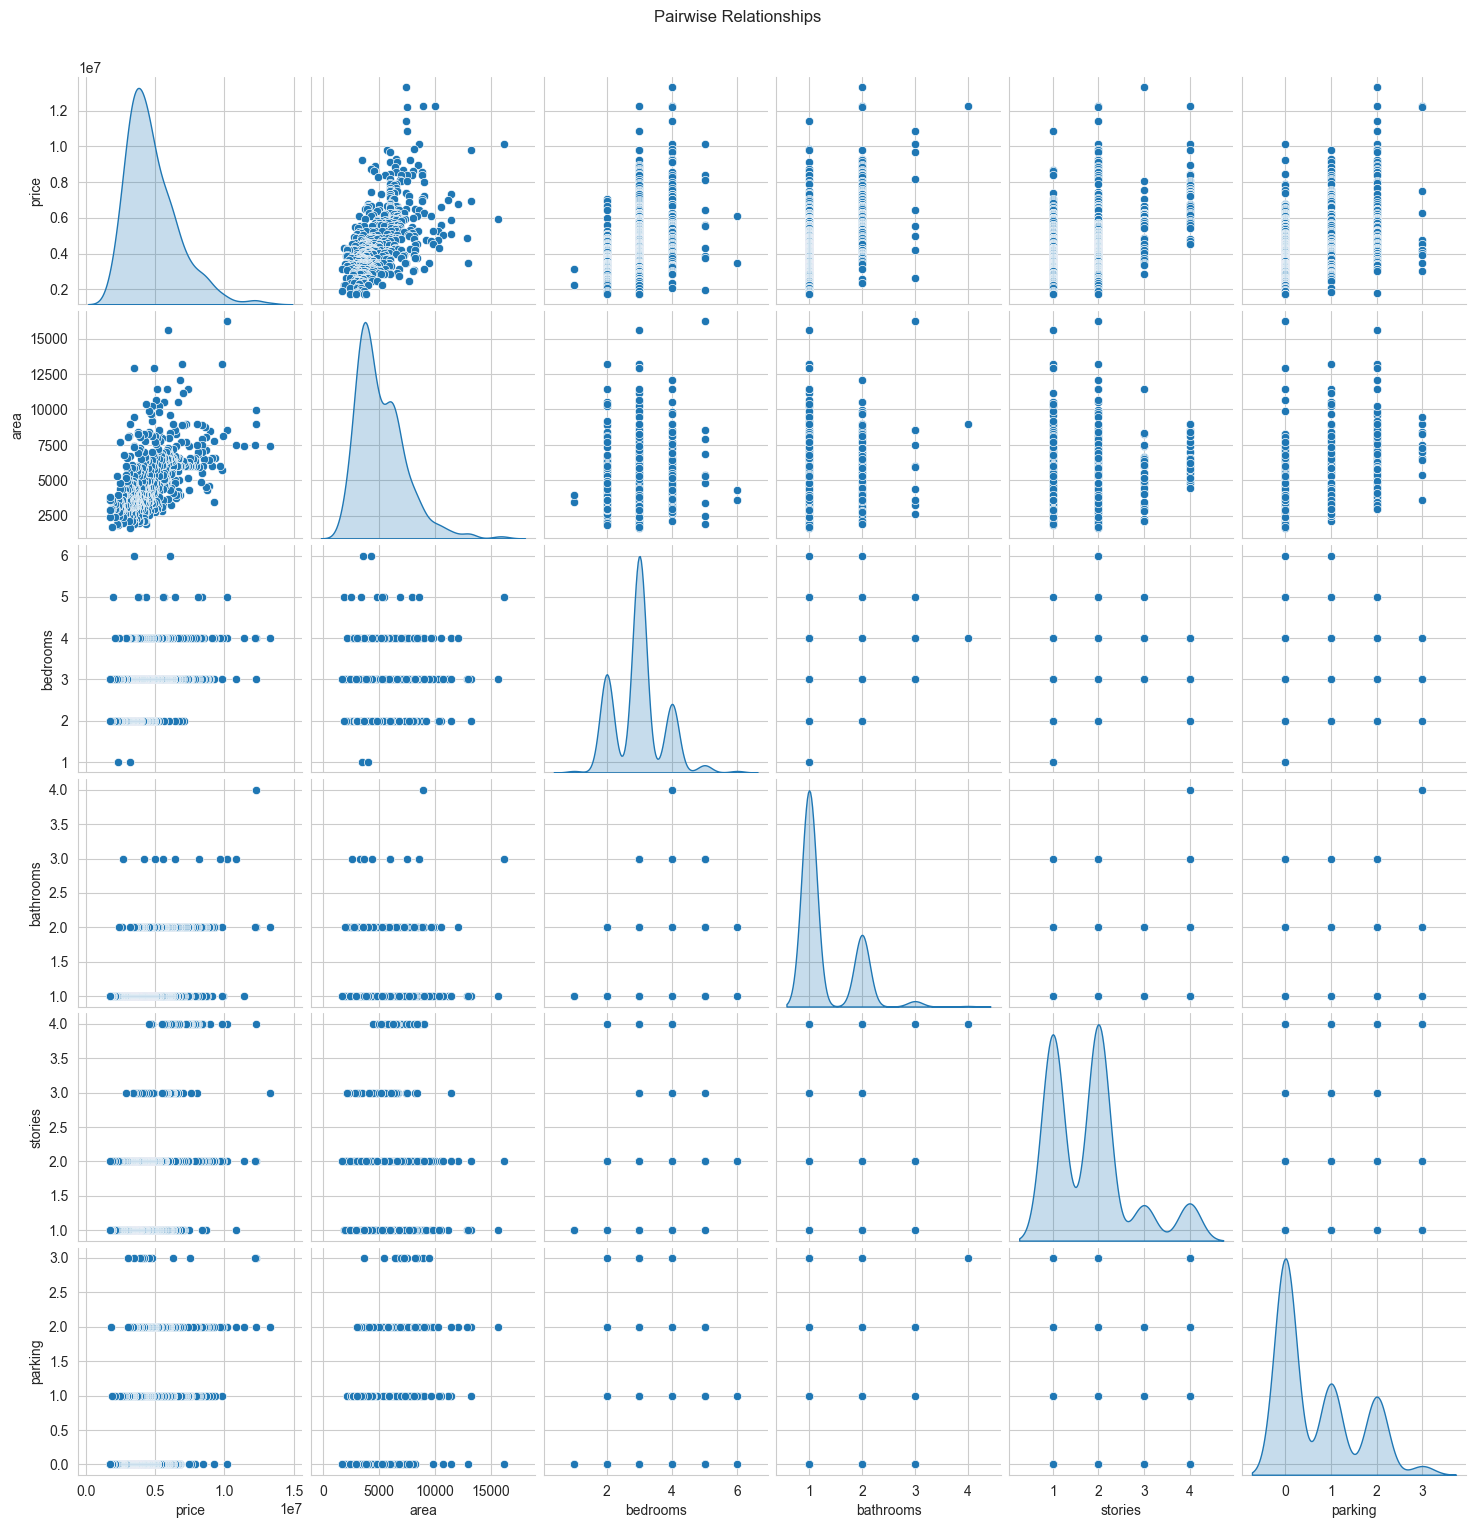

In [63]:
numeric_cols = df.select_dtypes(include="number").columns
sns.pairplot(df[numeric_cols], diag_kind="kde")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


In [64]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


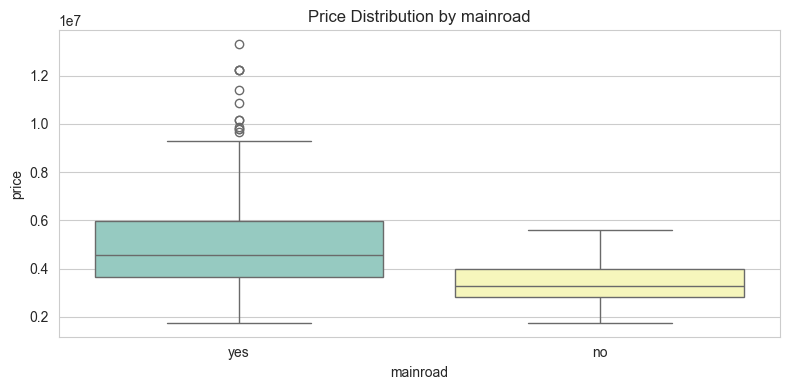

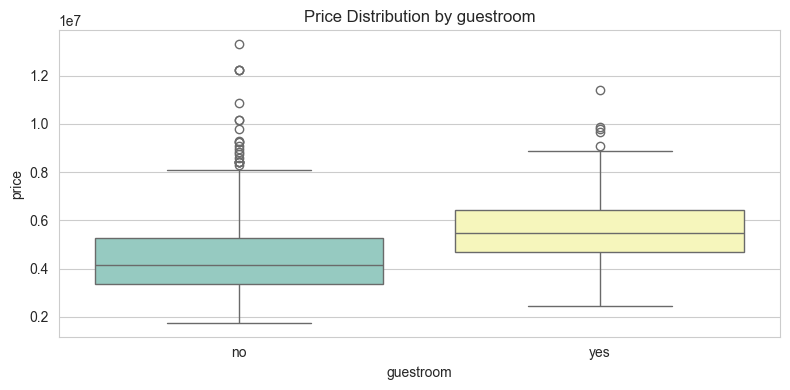

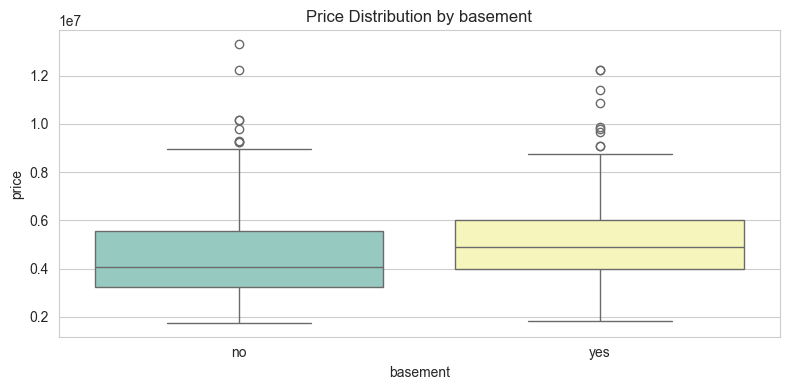

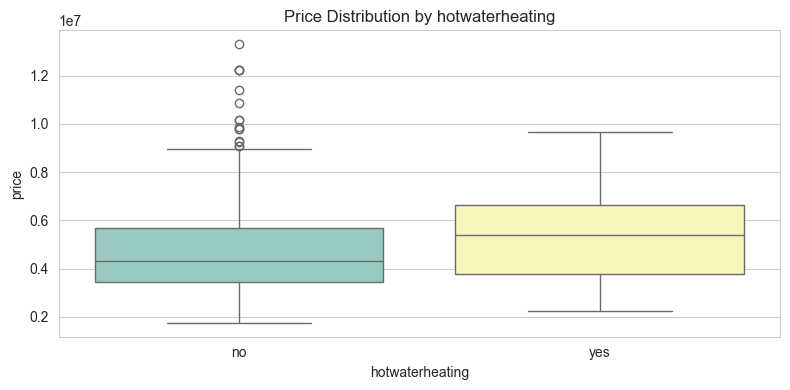

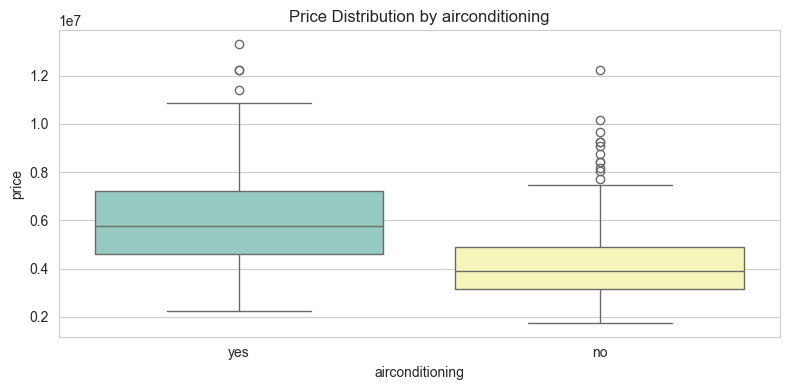

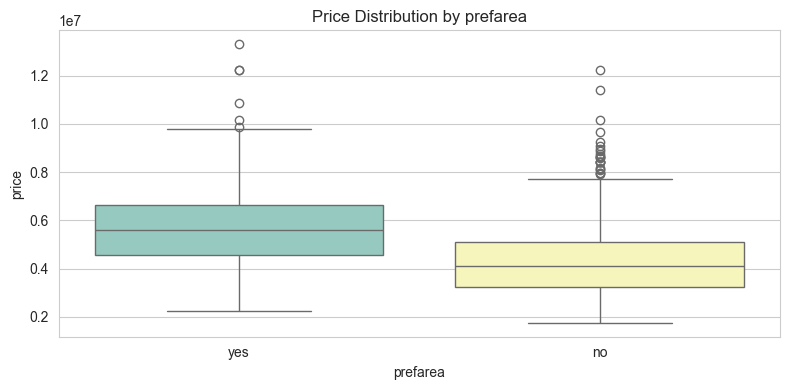

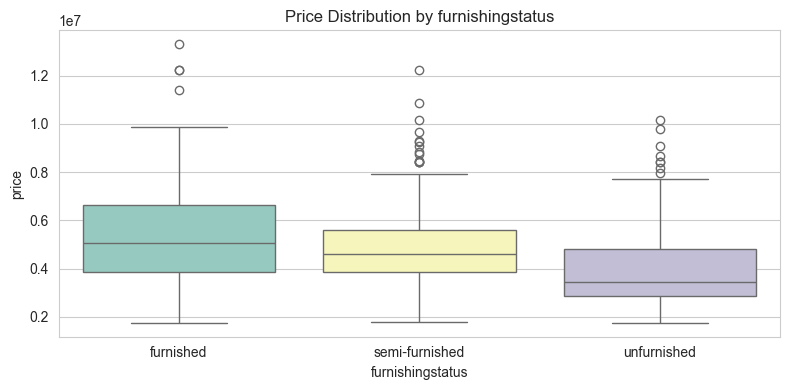

In [60]:
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, y="price", palette="Set3")
    plt.title(f"Price Distribution by {col}")
    plt.tight_layout()
    plt.show()


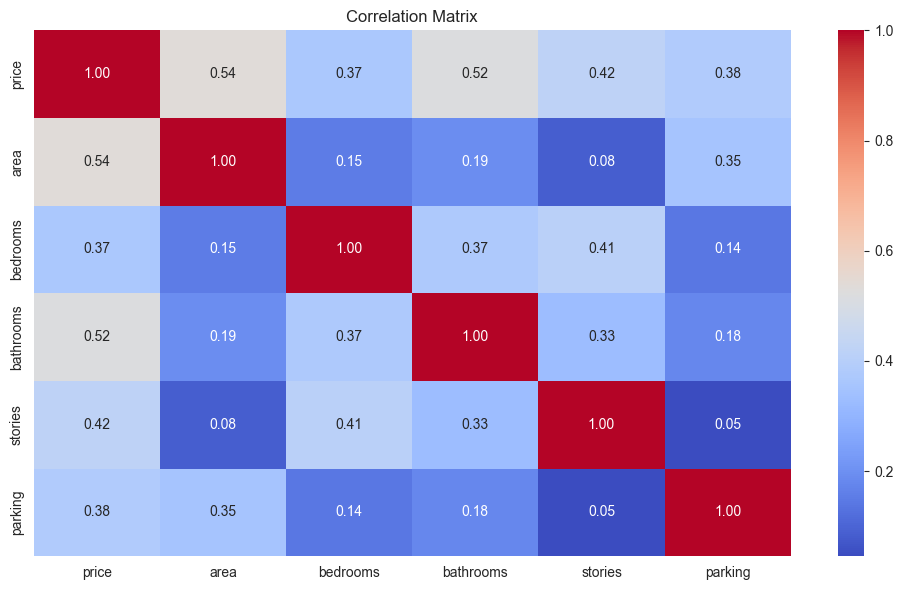

In [59]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Machine Learning Model Feauture Importance Prediction

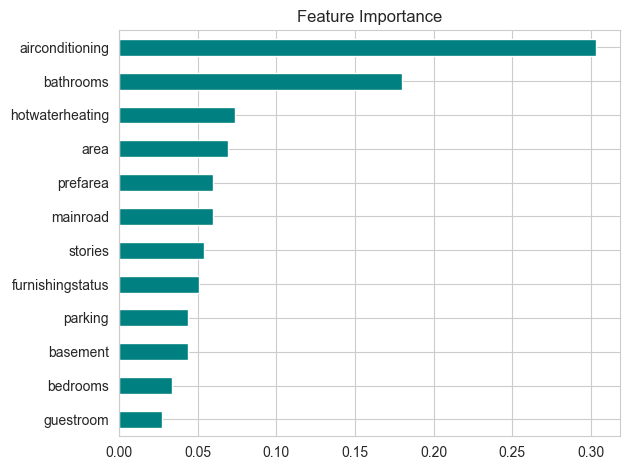

In [69]:
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
categorical_cols=df.select_dtypes(include="object")
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

model = XGBRegressor()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", color="teal")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
